In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.width',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.notebook_repr_html', True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading of mushroom_train in our kernel
train_data = pd.read_csv("D:\\Machine Learning\\DSG Assignment\\mushroom_train.csv")
train_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,t,?,215,s,k,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,e,e,94,s,s,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,e,?,244,s,s,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,t,?,286,k,s,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,e,c,110,s,s,w,w,p,w,36,o,p,n,s,m


In [3]:
len(train_data)

5686

In [4]:
train_data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
radius                       int64
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
weight                       int64
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [5]:
#two continuos variable and remaining are categorical variable
#below code for creating array of categorical_variable
categorical_variable = train_data.dtypes[train_data.dtypes == 'object'].index.values
categorical_variable

array(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'], dtype=object)

In [6]:
#uniqueness of categorical_variable
train_data[categorical_variable].apply(lambda x: len(x.unique()))

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In veil-type column all the values are same

It has no effect on our model

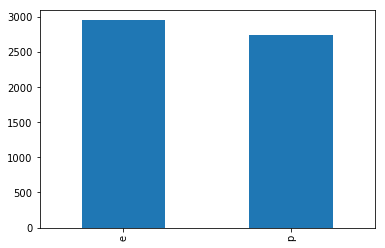

In [7]:
#plotting histogram for class column
train_data['class'].value_counts().plot(kind='bar')

In [8]:
# for finding counts of p and e in class column
train_data['class'].value_counts()

e    2945
p    2741
Name: class, dtype: int64

In [9]:
#we have to predict values of class column so class is our dependent_variable and rest are independent_variable
dependent_variable = 'class'
independent_variable = [x for x in (train_data.columns) if x not in [dependent_variable]]

In [10]:
# to convert categorical_variable into numbers for fitting in model
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [11]:
for a in categorical_variable:
    train_data[a] = LE.fit_transform(train_data[a])

In [12]:
train_data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,2,2,0,7,1,0,1,0,1,0,215,2,1,6,7,0,2,38,1,0,7,4,2
1,1,5,3,8,1,6,1,0,1,4,0,3,94,2,2,7,7,0,2,43,1,4,3,4,5
2,0,2,2,4,1,5,1,0,0,1,0,0,244,2,2,2,2,0,2,37,2,0,7,1,6
3,1,5,2,2,0,8,1,0,1,0,1,0,286,1,2,6,7,0,2,82,1,0,7,4,2
4,0,5,2,8,1,3,1,0,0,5,0,2,110,2,2,7,7,0,2,36,1,4,3,3,3
5,1,5,0,9,0,2,1,0,0,3,0,1,66,1,1,6,4,0,2,23,1,2,1,5,1
6,0,2,2,3,0,5,1,1,0,7,1,3,11,2,2,7,7,0,2,43,1,0,3,0,1
7,0,2,0,4,1,5,1,0,0,9,1,1,207,2,2,3,7,0,2,25,1,4,3,4,0
8,1,5,3,2,0,2,1,0,1,0,1,0,60,2,2,6,6,0,2,50,1,0,7,4,4
9,1,5,2,3,1,2,1,0,0,3,1,1,84,2,2,7,7,0,2,47,1,4,1,4,1


In [13]:
# for finding correlations between the features 
train_data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.042155,0.176899,-0.018315,-0.502157,-0.091765,0.119715,-0.348396,0.539296,-0.531714,-0.110221,-0.369834,0.051789,-0.339821,-0.303188,-0.141789,-0.140983,NaN,0.139915,0.007413,-0.217923,-0.413472,0.164303,0.292035,0.216358
cap-shape,0.042155,1.000000,-0.050507,-0.049525,-0.028575,-0.021651,0.073417,-0.001366,0.046013,-0.006245,0.065408,0.041449,-0.028290,-0.029756,-0.031333,-0.035038,-0.029181,NaN,0.064026,0.015889,-0.123694,-0.026889,-0.084278,0.070923,-0.042490
cap-surface,0.176899,-0.050507,1.000000,-0.023641,0.066776,0.051636,-0.033450,-0.274616,0.207781,-0.167356,-0.012494,-0.124124,0.010855,0.082593,0.099681,0.070571,0.063991,NaN,-0.013444,-0.010072,-0.023283,-0.113144,0.231465,0.012944,0.158039
cap-color,-0.018315,-0.049525,-0.023641,1.000000,-0.011004,-0.384536,0.041425,0.149580,-0.164310,0.079571,-0.455951,0.310565,-0.041630,-0.061341,-0.061882,-0.000779,-0.004182,NaN,0.037910,0.003412,0.000711,0.153141,-0.284759,-0.153048,0.038552
bruises,-0.502157,-0.028575,0.066776,-0.011004,1.000000,-0.055836,0.132196,-0.299498,-0.365449,0.526684,0.104269,0.244906,-0.041373,0.461709,0.459844,0.071998,0.088409,NaN,0.113148,-0.012115,0.049784,0.693615,-0.284631,0.082524,-0.078090
odor,-0.091765,-0.021651,0.051636,-0.384536,-0.055836,1.000000,-0.054703,0.065724,0.319945,-0.128353,0.458874,-0.205695,0.028405,0.127045,0.074021,0.175100,0.178315,NaN,-0.052985,0.010299,0.112166,-0.277452,0.473380,-0.047982,-0.033562
gill-attachment,0.119715,0.073417,-0.033450,0.041425,0.132196,-0.054703,1.000000,0.068124,0.103890,-0.124812,0.177779,0.134268,-0.045920,-0.081394,-0.112935,0.097695,0.093831,NaN,0.894226,0.016178,0.095721,-0.138358,-0.029423,0.169458,-0.027452
gill-spacing,-0.348396,-0.001366,-0.274616,0.149580,-0.299498,0.065724,0.068124,1.000000,-0.105925,0.103402,0.070504,0.338643,-0.028612,-0.201880,-0.205091,0.276282,0.253343,NaN,0.074113,0.002415,0.251853,-0.189465,0.060826,-0.527422,-0.149350
gill-size,0.539296,0.046013,0.207781,-0.164310,-0.365449,0.319945,0.103890,-0.105925,1.000000,-0.515428,0.208756,-0.333757,0.032306,0.055582,0.013449,0.300321,0.284636,NaN,0.101500,0.017982,-0.175917,-0.460385,0.619809,0.136891,0.160517
gill-color,-0.531714,-0.006245,-0.167356,0.079571,0.526684,-0.128353,-0.124812,0.103402,-0.515428,1.000000,-0.168804,0.311865,-0.027378,0.225269,0.261116,-0.064780,-0.080552,NaN,-0.092610,-0.008161,0.097492,0.624766,-0.408625,-0.033504,-0.206406


In [14]:
from sklearn.linear_model import LogisticRegression
Model1 = LogisticRegression()

In [15]:
# for splitting our train_data into 2 parts 
# one for model and other for test for finding accuracy on our data
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_data, test_size=.2, stratify=train_data['class'])
test.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
3839,0,5,3,8,1,3,1,0,0,10,0,2,6,2,2,7,7,0,2,25,1,4,3,2,3
5297,0,2,2,8,0,5,1,1,0,7,1,3,297,0,2,7,7,0,2,26,1,0,2,3,1
3867,1,2,2,4,0,2,1,0,1,0,1,0,283,2,1,7,7,0,2,45,1,0,7,4,4
2977,1,3,2,2,0,7,1,0,1,0,1,0,357,1,2,6,6,0,2,22,1,0,7,4,4
3007,1,5,3,2,0,2,1,0,1,0,1,0,233,2,1,7,7,0,2,24,1,0,7,4,0


In [16]:
# fitting model
Model1.fit(train[independent_variable],train[dependent_variable])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
#prediction of test data of train_data
prediction1 = Model1.predict(test[independent_variable])

In [18]:
prediction1

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [19]:
# for finding accuracy of test data of train_data
from sklearn.metrics import accuracy_score
accuracy_score(prediction1,test['class'])

0.9472759226713533

In [20]:
#finding confusion_matrix and classification_report of above prediction
from sklearn.metrics import confusion_matrix,classification_report
print confusion_matrix(test['class'], prediction1 )

print classification_report(test['class'], prediction1 )

[[559  30]
 [ 30 519]]
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       589
          1       0.95      0.95      0.95       549

avg / total       0.95      0.95      0.95      1138



In [21]:
# now we change our model by finding best parameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
Model2 = LogisticRegression()
parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
def cv_optimize(model, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    gs = GridSearchCV(model, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

In [22]:
df = train.drop('class', axis =1)
column_names = df.columns
X = train[column_names].values
y = train['class'].values

model21 = cv_optimize(Model2, parameters,X,y)
model21

BEST {'C': 1000} 0.974934036939 [mean: 0.85642, std: 0.01208, params: {'C': 0.001}, mean: 0.90567, std: 0.00979, params: {'C': 0.01}, mean: 0.93734, std: 0.00638, params: {'C': 0.1}, mean: 0.95141, std: 0.00607, params: {'C': 1}, mean: 0.95778, std: 0.00775, params: {'C': 10}, mean: 0.97274, std: 0.00866, params: {'C': 100}, mean: 0.97493, std: 0.00730, params: {'C': 1000}, mean: 0.97383, std: 0.00727, params: {'C': 10000}, mean: 0.97493, std: 0.00753, params: {'C': 100000}]


C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
prediction2=model21.predict(test[independent_variable])

In [24]:
prediction2

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [25]:
accuracy_score(prediction2,test['class'])

0.97539543057996481

In [26]:
print confusion_matrix(test['class'], prediction2 )

print classification_report(test['class'], prediction2 )

[[570  19]
 [  9 540]]
             precision    recall  f1-score   support

          0       0.98      0.97      0.98       589
          1       0.97      0.98      0.97       549

avg / total       0.98      0.98      0.98      1138



In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
Model3 = LogisticRegression()
kf = KFold(n_splits = 5)
scoring = 'accuracy'
results = cross_val_score(model21, X, y, cv=kf, scoring = scoring)
print results
a = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    b = [X_train, X_test,Y_train, Y_test]
    df = pd.DataFrame(X_train, columns = independent_variable)
    df2 = pd.DataFrame(X_test, columns = independent_variable)
    p = cv_optimize(Model3, parameters,X_train,Y_train)
    prediction3 = p.predict(df2)
    print accuracy_score(prediction3, Y_test)
    a.append(p)
    print confusion_matrix(Y_test, prediction3 )
    print classification_report(Y_test, prediction3 )

[ 0.97802198  0.96153846  0.97362637  0.9779978   0.98349835]
BEST {'C': 100000} 0.975810885102 [mean: 0.85322, std: 0.00747, params: {'C': 0.001}, mean: 0.89500, std: 0.01320, params: {'C': 0.01}, mean: 0.93595, std: 0.00842, params: {'C': 0.1}, mean: 0.94750, std: 0.00809, params: {'C': 1}, mean: 0.95300, std: 0.01042, params: {'C': 10}, mean: 0.97306, std: 0.01189, params: {'C': 100}, mean: 0.97416, std: 0.01137, params: {'C': 1000}, mean: 0.97526, std: 0.01038, params: {'C': 10000}, mean: 0.97581, std: 0.01003, params: {'C': 100000}]
0.978021978022
[[446   5]
 [ 15 444]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       451
          1       0.99      0.97      0.98       459

avg / total       0.98      0.98      0.98       910



C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'C': 10000} 0.968114348543 [mean: 0.84992, std: 0.01095, params: {'C': 0.001}, mean: 0.89665, std: 0.01370, params: {'C': 0.01}, mean: 0.93458, std: 0.01128, params: {'C': 0.1}, mean: 0.94887, std: 0.00840, params: {'C': 1}, mean: 0.95245, std: 0.00898, params: {'C': 10}, mean: 0.96537, std: 0.00653, params: {'C': 100}, mean: 0.96729, std: 0.00804, params: {'C': 1000}, mean: 0.96811, std: 0.00871, params: {'C': 10000}, mean: 0.96811, std: 0.00871, params: {'C': 100000}]
0.962637362637
[[462  13]
 [ 21 414]]
             precision    recall  f1-score   support

          0       0.96      0.97      0.96       475
          1       0.97      0.95      0.96       435

avg / total       0.96      0.96      0.96       910



C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'C': 100000} 0.968114348543 [mean: 0.85569, std: 0.01093, params: {'C': 0.001}, mean: 0.89830, std: 0.01126, params: {'C': 0.01}, mean: 0.93458, std: 0.00996, params: {'C': 0.1}, mean: 0.94970, std: 0.01195, params: {'C': 1}, mean: 0.95245, std: 0.01145, params: {'C': 10}, mean: 0.96592, std: 0.01251, params: {'C': 100}, mean: 0.96784, std: 0.01184, params: {'C': 1000}, mean: 0.96729, std: 0.01311, params: {'C': 10000}, mean: 0.96811, std: 0.01233, params: {'C': 100000}]
0.973626373626
[[439  11]
 [ 13 447]]
             precision    recall  f1-score   support

          0       0.97      0.98      0.97       450
          1       0.98      0.97      0.97       460

avg / total       0.97      0.97      0.97       910



C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'C': 100000} 0.974168727672 [mean: 0.85436, std: 0.00659, params: {'C': 0.001}, mean: 0.90354, std: 0.00727, params: {'C': 0.01}, mean: 0.93652, std: 0.00556, params: {'C': 0.1}, mean: 0.95466, std: 0.00555, params: {'C': 1}, mean: 0.96043, std: 0.00957, params: {'C': 10}, mean: 0.97170, std: 0.00765, params: {'C': 100}, mean: 0.97362, std: 0.00858, params: {'C': 1000}, mean: 0.97362, std: 0.00893, params: {'C': 10000}, mean: 0.97417, std: 0.00934, params: {'C': 100000}]
0.97799779978
[[457  11]
 [  9 432]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       468
          1       0.98      0.98      0.98       441

avg / total       0.98      0.98      0.98       909



C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'C': 1000} 0.983237153064 [mean: 0.84721, std: 0.01295, params: {'C': 0.001}, mean: 0.89832, std: 0.00465, params: {'C': 0.01}, mean: 0.93542, std: 0.00366, params: {'C': 0.1}, mean: 0.95164, std: 0.00235, params: {'C': 1}, mean: 0.96180, std: 0.00471, params: {'C': 10}, mean: 0.98021, std: 0.00394, params: {'C': 100}, mean: 0.98324, std: 0.00454, params: {'C': 1000}, mean: 0.98324, std: 0.00479, params: {'C': 10000}, mean: 0.98241, std: 0.00509, params: {'C': 100000}]
0.983498349835
[[499  13]
 [  2 395]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.99       512
          1       0.97      0.99      0.98       397

avg / total       0.98      0.98      0.98       909



C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [28]:
# using DecisionTreeClassifier for predictiong our model
from sklearn.tree import DecisionTreeClassifier
Model4 = DecisionTreeClassifier()
Model4.fit(train[independent_variable],train[dependent_variable])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [29]:
prediction4  = Model4.predict(test[independent_variable])
prediction4

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [30]:
confusion_matrix(test['class'], prediction4 )

array([[589,   0],
       [  0, 549]])

In [31]:
print classification_report(test['class'], prediction4)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       589
          1       1.00      1.00      1.00       549

avg / total       1.00      1.00      1.00      1138



# Prediction of mushroom_test

In [32]:
test_data = pd.read_csv("D:\\Machine Learning\\DSG Assignment\\mushroom_test.csv")
test_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,b,32,s,s,p,g,p,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,b,7,k,k,b,b,p,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,c,2,s,s,w,w,p,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,b,2,k,k,n,b,p,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,c,10,s,s,w,w,p,w,24,o,p,k,n,m


In [33]:
test_data.shape


(2438, 24)

In [34]:
categorical_variable_test = test_data.dtypes[test_data.dtypes == 'object'].index.values
categorical_variable_test


array(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'], dtype=object)

In [35]:
test_data[categorical_variable_test].apply(lambda x: len(x.unique()))

cap-shape                    5
cap-surface                  3
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       8
stalk-color-below-ring       9
veil-type                    1
veil-color                   3
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [36]:
for a in categorical_variable_test:
    test_data[a] = LE.fit_transform(test_data[a])

In [37]:
test_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,4,0,3,1,5,1,0,0,9,1,1,32,2,2,6,3,0,2,23,1,4,2,5,0
1,4,2,3,0,2,1,0,0,2,0,1,7,1,1,0,0,0,2,23,1,2,1,4,0
2,0,1,8,1,0,1,0,0,10,0,2,2,2,2,7,7,0,2,24,1,4,2,3,3
3,1,2,9,0,2,1,0,0,7,0,1,2,1,1,4,0,0,2,53,1,2,1,5,0
4,0,2,9,1,0,1,0,0,10,0,2,10,2,2,7,7,0,2,24,1,4,2,2,3


In [38]:
prediction = Model4.predict(test_data)

In [39]:
test_data['class'] = prediction

In [40]:
test_data['class'].value_counts()

0    1263
1    1175
Name: class, dtype: int64

In [41]:
test_data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat,class
0,4,0,3,1,5,1,0,0,9,1,1,32,2,2,6,3,0,2,23,1,4,2,5,0,0
1,4,2,3,0,2,1,0,0,2,0,1,7,1,1,0,0,0,2,23,1,2,1,4,0,1
2,0,1,8,1,0,1,0,0,10,0,2,2,2,2,7,7,0,2,24,1,4,2,3,3,0
3,1,2,9,0,2,1,0,0,7,0,1,2,1,1,4,0,0,2,53,1,2,1,5,0,1
4,0,2,9,1,0,1,0,0,10,0,2,10,2,2,7,7,0,2,24,1,4,2,2,3,0
5,1,0,9,0,2,1,0,0,3,0,1,89,1,1,4,0,0,2,23,1,2,1,5,0,1
6,4,0,5,0,1,1,0,1,5,0,1,44,2,2,7,7,0,2,24,1,4,3,3,0,1
7,2,1,4,0,5,0,0,0,5,0,0,564,2,2,5,5,0,1,24,1,4,0,4,2,0
8,1,2,4,1,5,1,0,0,7,1,1,67,2,2,6,7,0,2,23,1,4,3,4,0,0
9,1,1,8,1,2,1,0,0,3,1,1,17,2,2,7,7,0,2,23,1,4,1,4,5,1
